Importar librerias para el modelo

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


Creación de un perceptrón manual de una sola capa

In [129]:
class BasicPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, bias=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = weights
        self.bias = bias
        self.activation_functions = {
            'sigmoid': self.sigmoid,
            'relu': self.relu,
            'step': self.step
        }

    def fit(self, X, y, activation_function='sigmoid'):
        n_samples, n_features = X.shape
        n_classes = y.shape[1]  # Número de clases para la capa de salida
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                predicted = self.activation(linear_output, activation_function)
                error = y[i] - predicted

                # Update weights and bias using backpropagation
                self.weights += self.learning_rate * np.outer(X[i], error)
                self.bias += self.learning_rate * error

    def step(self, x):
        """
        Step activation function
        """
        return 1 if x >= 0 else 0
        
    def sigmoid(self, x):
        """
        Sigmoid activation function
        """
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x):
        """
        ReLU activation function
        """
        return np.sigmoid(0, x)

    def activation(self, x, activation_function='sigmoid'):
        """
        Sigmoid activation function
        """
        if activation_function in self.activation_functions:
            return self.activation_functions[activation_function](x)
        else:
            raise Exception('Activation function not allowed')

    def predict(self, X):
        """
        It creates a linear output which is passed by an activation function
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def accuracy(self, X, y_true):
        """
        Returns the accuracy of the model
        """
        y_pred = self.predict(X)
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))


In [130]:
 #Cargar los datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocesar los datos y las etiquetas
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

(<matplotlib.image.AxesImage at 0x2a6ed3970>, 1)

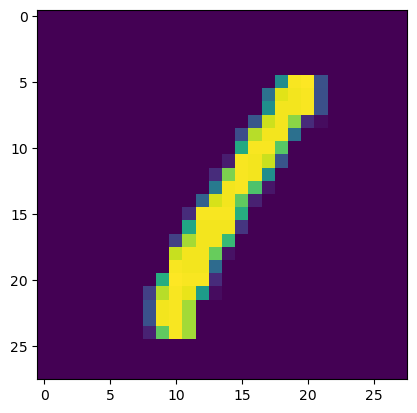

In [131]:
# Ver las imagenes con matplotli
plt.imshow(train_data[3]), train_labels[3]

Entrenamiento 1:

In [132]:

# Crear el modelo con el perceptrón
model = BasicPerceptron()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

# Evaluar la precisión (accuracy) del modelo en los datos de prueba
accuracy = model.accuracy(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.91


Entrenamiento 2:

In [133]:
# Crear el modelo con el perceptrón
model = BasicPerceptron(learning_rate=0.01, epochs=5)

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

# Evaluar la precisión (accuracy) del modelo en los datos de prueba
accuracy = model.accuracy(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9063


Entrenamiento 3:

In [134]:
# Crear el modelo con el perceptrón
model = BasicPerceptron(learning_rate=0.01, epochs=200)

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

# Evaluar la precisión (accuracy) del modelo en los datos de prueba
accuracy = model.accuracy(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9097
